<a href="https://colab.research.google.com/github/ShalilG/Stock-Market-Analysis/blob/main/SMACrossoverTradingStrategy_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Description: Use the SMA crossover Strategy and Python to get buy and sell signals 

In [2]:
pip install yfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 954 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
#Import the libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import yfinance as yf 
plt.style.use('fivethirtyeight')

In [4]:
#Load the data 
tick = 'AAPL'

In [5]:
#Show the data
df = yf.download(tick, start = '2015-08-06', end = '2022-8-4')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-06,28.992500,29.125000,28.530001,28.782499,26.317570,211612000
2015-08-07,28.645000,29.062500,28.625000,28.879999,26.406721,154681600
2015-08-10,29.132500,29.997499,29.132500,29.930000,27.366800,219806400
2015-08-11,29.452499,29.545000,28.332500,28.372499,25.942684,388331200
2015-08-12,28.132500,28.855000,27.407499,28.809999,26.342716,404870000
...,...,...,...,...,...,...
2022-07-28,156.979996,157.639999,154.410004,157.350006,157.350006,81378700
2022-07-29,161.240005,163.630005,159.500000,162.509995,162.509995,101689200
2022-08-01,161.009995,163.589996,160.889999,161.509995,161.509995,67829400


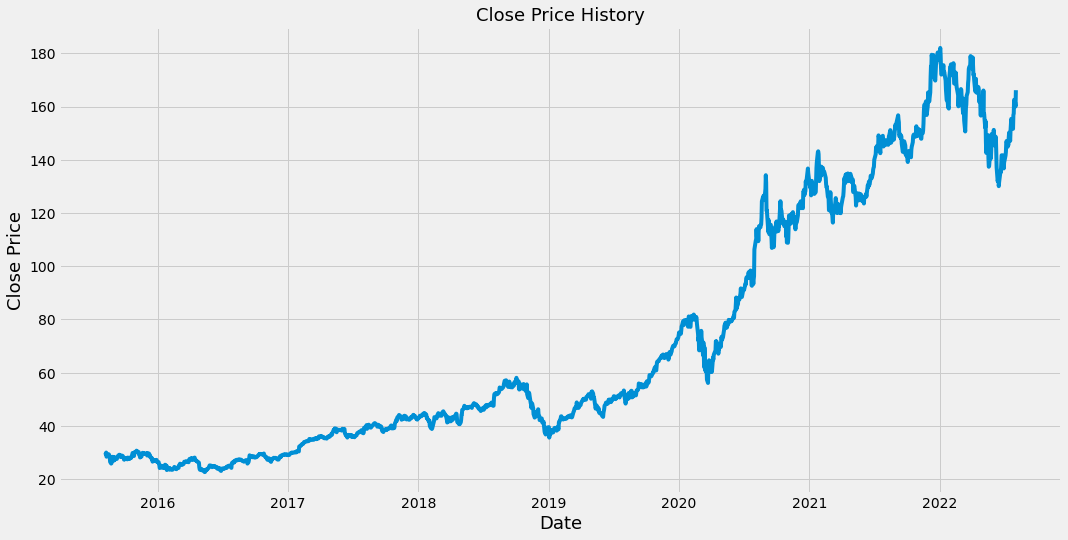

In [6]:
#Visually show the close price 
plt.figure(figsize=(16,8))
plt.title('Close Price History', fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [7]:
#Create a function to calculate the SMA 
def SMA(data, period = 30, column='Close'):
  return data[column].rolling(window=period).mean()
  

In [8]:
#Create two new columns to store the 20 day and 50 day SMA 
df['SMA20']=SMA(df, 20)
df['SMA50']=SMA(df, 50)

In [9]:
#Get the buy and sell signals 
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1, 0)
df['Position'] = df['Signal'].diff()

df['Buy'] = np.where(df['Position'] == 1, df['Close'], np.NAN)
df['Sell'] = np.where(df['Position'] == -1, df['Close'], np.NAN)

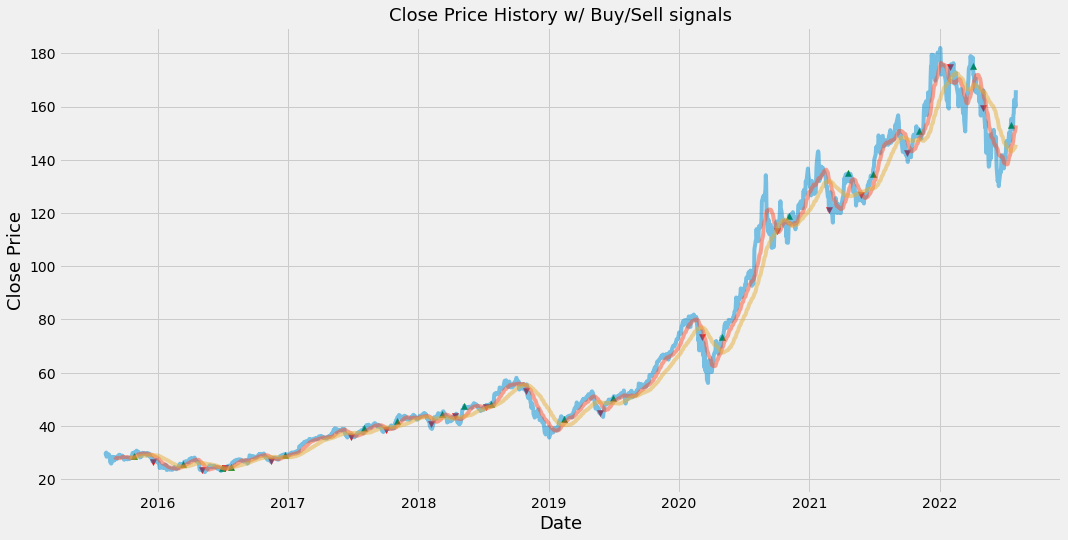

In [10]:
#Visually show the Close Price with the SMAs and Buy/Sell signals
plt.figure(figsize=(16,8))
plt.title('Close Price History w/ Buy/Sell signals', fontsize=18)
plt.plot(df['Close'], alpha = 0.5, label = 'Close')
plt.plot(df['SMA20'], alpha = 0.5, label = 'SMA20')
plt.plot(df['SMA50'], alpha = 0.5, label = 'SMA50')
plt.scatter(df.index, df['Buy'], alpha = 1, label = 'Buy Signal', marker = '^', color = 'green')
plt.scatter(df.index, df['Sell'], alpha = 1, label = 'Sell Signal', marker = 'v', color = 'red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()